In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.rcParams['axes.grid'] = True

In [3]:
df = pd.read_csv("crime.csv", header=[0,1,2],index_col = 0)
df_reverse = df.transpose()
df_reverse = df_reverse.fillna(0)
df = df_reverse.assign(강력범죄강간·강제추행 = lambda x: 
                       x['강력범죄강간·강제추행']
                       +x['강력범죄유사강간']
                       +x['강력범죄강간']
                       +x['강력범죄강제추행']
                       +x['강력범죄기타강간·강제추행등'])

df.drop(['강력범죄유사강간','강력범죄강간','강력범죄강제추행'
         ,'강력범죄기타강간·강제추행등'],axis=1,inplace=True)

In [4]:
df_test = df.reset_index()

<AxesSubplot:>

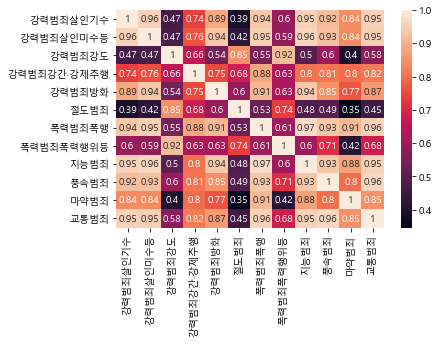

In [5]:
df_test_cor = df_test.corr()
sn.heatmap(df_test_cor,annot=True)

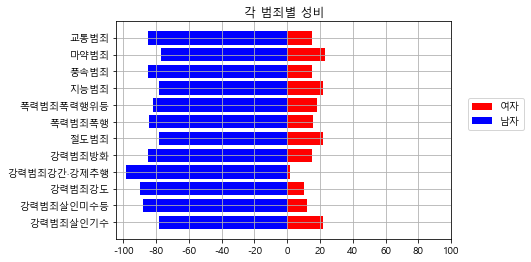

In [7]:
categories = ['강력범죄살인기수','강력범죄살인미수등'
              ,'강력범죄강도','강력범죄강간·강제추행'
              ,'강력범죄방화','절도범죄','폭력범죄폭행'
              ,'폭력범죄폭력행위등','지능범죄','풍속범죄'
              ,'마약범죄','교통범죄']
check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
df_set_male = df_set_male.drop(['연도','성별','연령'],axis=1)
df_male = df_set_male.sum()
df_male = np.array(df_male)
check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
df_set_female = df_set_female.drop(['연도','성별','연령'],axis=1)
df_female = df_set_female.sum()
df_female = np.array(df_female)

df_total = df_male + df_female
df_male = (df_male / df_total) * 100
df_male = np.round(df_male,0)
df_female = (df_female / df_total) * 100
df_female = np.round(df_female,0)
Y = np.arange(12)
plt.barh(Y, df_female, color = 'r',label="여자")
plt.barh(Y, -df_male, color = 'b',label="남자")
plt.yticks(Y,categories)
plt.xticks([-100,-80,-60,-40,-20,0,20,40,60,80,100])
plt.legend(loc=(1.05,0.5))
plt.title("각 범죄별 성비")
plt.show()

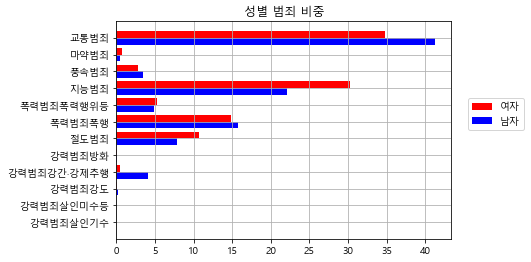

In [9]:
check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
df_set_male = df_set_male.drop(['연도','성별','연령'],axis=1)
df_male = df_set_male.sum()
df_male = np.array(df_male)
check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
df_set_female = df_set_female.drop(['연도','성별','연령'],axis=1)
df_female = df_set_female.sum()
df_female = np.array(df_female)

df_male_total = sum(list(df_male))
df_male = (df_male / df_male_total) *100
df_male = np.round(df_male,1)
df_female_total = sum(list(df_female))
df_female = (df_female / df_female_total) * 100
df_female = np.round(df_female,1)

Y = np.arange(12)
bar_width = 0.20
plt.barh(Y+bar_width, df_female,height=0.4,color = 'r',label="여자")
plt.barh(Y-bar_width, df_male,height=0.4,color = 'b',label="남자")
plt.yticks(Y,categories)
plt.legend(loc=(1.05,0.5))
plt.title("성별 범죄 비중")
plt.show()

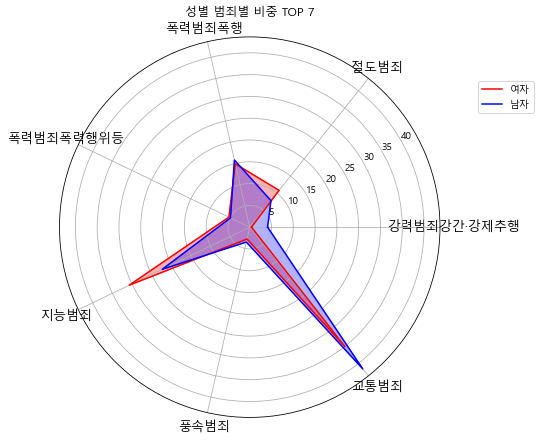

In [16]:
categories = ['강력범죄강간·강제추행','절도범죄','폭력범죄폭행'
              ,'폭력범죄폭력행위등','지능범죄','풍속범죄','교통범죄']

check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
df_set_male = df_set_male.drop(['연도','성별','연령','마약범죄','강력범죄방화','강력범죄강도','강력범죄살인미수등','강력범죄살인기수'],axis=1)
df_male = df_set_male.sum()
df_male = np.array(df_male)
check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
df_set_female = df_set_female.drop(['연도','성별','연령','마약범죄','강력범죄방화','강력범죄강도','강력범죄살인미수등','강력범죄살인기수'],axis=1)
df_female = df_set_female.sum()
df_female = np.array(df_female)

df_male_total = sum(list(df_male))
df_male = (df_male / df_male_total) *100
df_male = np.round(df_male,1)
male = list(df_male)
male += male[:1]
df_female_total = sum(list(df_female))
df_female = (df_female / df_female_total) * 100
df_female = np.round(df_female,1)
female = list(df_female)
female += female[:1]

angles = [n/float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]
plt.figure(figsize=(7,7))
ax=plt.subplot(polar=True)
plt.xticks(angles[:-1], labels=categories, fontsize=13)
ax.set_rlabel_position(30)

ax.plot(angles,female,label="여자",linestyle='solid',color='red')
ax.fill(angles,female,color='red',alpha=0.3)
ax.plot(angles,male,label="남자",linestyle='solid',color='blue')
ax.fill(angles,male,color='blue',alpha=0.3)
plt.legend(loc=(1.1,0.8))
plt.title("성별 범죄별 비중 TOP 7")
plt.show()

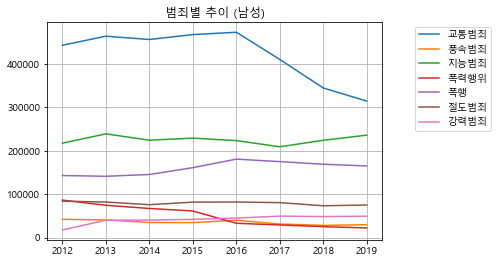

In [21]:
year = [2012,2013,2014,2015,2016,2017,2018,2019]

check_male = df_test['성별'] == 'M'
df_set_male = df_test[check_male]
m_gyo = list(df_set_male['교통범죄'].groupby(df_set_male["연도"]).sum())
m_pung = list(df_set_male['풍속범죄'].groupby(df_set_male["연도"]).sum())
m_ji = list(df_set_male['지능범죄'].groupby(df_set_male["연도"]).sum())
m_pok1 = list(df_set_male['폭력범죄폭력행위등'].groupby(df_set_male["연도"]).sum())
m_pok2 = list(df_set_male['폭력범죄폭행'].groupby(df_set_male["연도"]).sum())
m_jeol = list(df_set_male['절도범죄'].groupby(df_set_male["연도"]).sum())
m_gang = list(df_set_male['강력범죄강간·강제추행'].groupby(df_set_male["연도"]).sum())

plt.plot(year,m_gyo,label = "교통범죄")
plt.plot(year,m_pung,label = "풍속범죄")
plt.plot(year,m_ji,label = "지능범죄")
plt.plot(year,m_pok1,label = "폭력행위")
plt.plot(year,m_pok2,label = "폭행")
plt.plot(year,m_jeol,label = "절도범죄")
plt.plot(year,m_gang,label = "강력범죄")
plt.legend(loc= (1.1,0.5))
plt.title("범죄별 추이 (남성)")
plt.show()

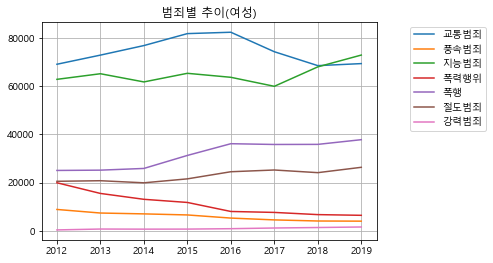

In [22]:
year = [2012,2013,2014,2015,2016,2017,2018,2019]

check_female = df_test['성별'] == 'F'
df_set_female = df_test[check_female]
f_gyo = list(df_set_female['교통범죄'].groupby(df_set_female["연도"]).sum())
f_pung = list(df_set_female['풍속범죄'].groupby(df_set_female["연도"]).sum())
f_ji = list(df_set_female['지능범죄'].groupby(df_set_female["연도"]).sum())
f_pok1 = list(df_set_female['폭력범죄폭력행위등'].groupby(df_set_female["연도"]).sum())
f_pok2 = list(df_set_female['폭력범죄폭행'].groupby(df_set_female["연도"]).sum())
f_jeol = list(df_set_female['절도범죄'].groupby(df_set_female["연도"]).sum())
f_gang = list(df_set_female['강력범죄강간·강제추행'].groupby(df_set_female["연도"]).sum())

plt.plot(year,f_gyo,label = "교통범죄")
plt.plot(year,f_pung,label = "풍속범죄")
plt.plot(year,f_ji,label = "지능범죄")
plt.plot(year,f_pok1,label = "폭력행위")
plt.plot(year,f_pok2,label = "폭행")
plt.plot(year,f_jeol,label = "절도범죄")
plt.plot(year,f_gang,label = "강력범죄")
plt.legend(loc= (1.1,0.5))
plt.title("범죄별 추이(여성)")
plt.show()

In [1]:
df = pd.read_csv("motiv.csv",index_col=0)
df = df.fillna(0)
df = df.transpose()
df = df.reset_index()
df.drop(["기타","보복","신고,고소","증언","수사협조","index"],axis=1,inplace=True)
df.drop(["도박비마련","허영사치심","치부","사행심","가정불화","유혹","현실불만"],axis=1,inplace=True)
categories = ["이욕","생활비마련","유흥비마련","호기심",'우발적',"부주의","미상"]
dfTotal = sum(df.sum())
dfList = list(df.sum())
dfList = np.array(dfList)
df_set = (dfList / dfTotal) * 100
df_set = np.round(df_set,0)
df_set = list(df_set)
df_set += df_set[:1]
angles = [n/float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]
plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
plt.xticks(angles[:-1], labels=categories, fontsize=13)
ax.set_rlabel_position(30)
ax.plot(angles,df_set,label="범행동기",linestyle='solid',color='red')
ax.fill(angles,df_set,color='red',alpha=0.3)

plt.title("소년범죄 동기 TOP 7 (기타 제외)")
plt.show()

NameError: name 'pd' is not defined

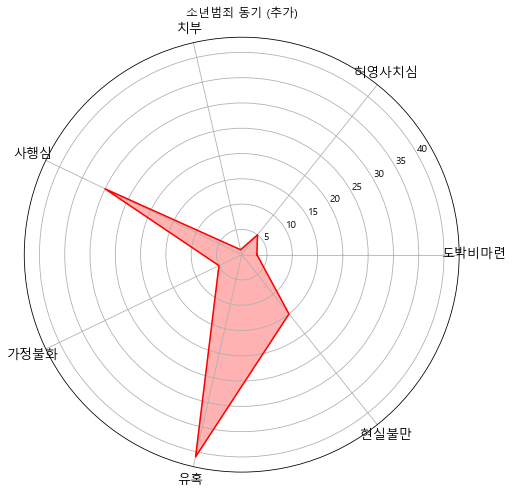

In [27]:
df = pd.read_csv("motiv.csv",index_col=0)
df = df.fillna(0)
df = df.transpose()
df = df.reset_index()
df.drop(["기타","보복","신고,고소","증언","수사협조","index"],axis=1,inplace=True)
df.drop(["이욕","생활비마련","유흥비마련","호기심",'우발적',"부주의","미상"],axis=1,inplace=True)
categories = ["도박비마련","허영사치심","치부","사행심","가정불화","유혹","현실불만"]
dfTotal = sum(df.sum())
dfList = list(df.sum())
dfList = np.array(dfList)
df_set = (dfList / dfTotal) * 100
df_set = np.round(df_set,0)
df_set = list(df_set)
df_set += df_set[:1]
angles = [n/float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]
plt.figure(figsize=(8,8))
ax=plt.subplot(polar=True)
plt.xticks(angles[:-1], labels=categories, fontsize=13)
ax.set_rlabel_position(30)
ax.plot(angles,df_set,label="범행동기",linestyle='solid',color='red')
ax.fill(angles,df_set,color='red',alpha=0.3)
plt.title("소년범죄 동기 (추가)")
plt.show()

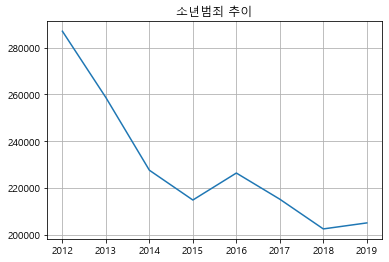

In [26]:
df = pd.read_csv("age.csv")
df = df.fillna(0)
dfList = list(df.sum())
dfList

X = [2012,2013,2014,2015,2016,2017,2018,2019]
plt.plot(X,dfList)
plt.title("소년범죄 추이")
plt.show()